<a href="https://colab.research.google.com/github/ActiveStacks/DatasetTwo/blob/main/Final1_EXPERIMENT_GRAPHCODEBERTLLM_2E7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
path7 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Combined_Processed.csv')

In [ ]:
df = pd.read_csv(path7)

<ipython-input-4-a0e962f47e45>:1: DtypeWarning: Columns (1,2,3,5,6,8,9,10,11,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path7)


In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog,NaN,NaN,NaN


In [ ]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog,NaN,NaN,NaN


In [ ]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4377108,5344794,NaN,NaN,NaN,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN
4377109,5344795,NaN,NaN,NaN,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN
4377110,5344796,NaN,NaN,NaN,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN
4377111,5344797,NaN,NaN,NaN,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN
4377112,5344798,NaN,NaN,NaN,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN


In [ ]:
df.shape

(4377113, 18)

In [ ]:
df.describe()

,index,CVSS,Vulnerability_status
count,4.377113e+06,33622.000000,4.377113e+06
mean,2.426505e+06,6.324332,1.194532e-02
std,1.484919e+06,1.632369,1.086399e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,1.097298e+06,4.300000,0.000000e+00
50%,2.563283e+06,7.500000,0.000000e+00
75%,3.672990e+06,7.500000,0.000000e+00
max,5.344798e+06,8.800000,1.000000e+00


In [ ]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code',
       'category', 'severity', 'qark_name'],
      dtype='object')

In [ ]:
df.nunique()

,0
index,4377113
Description,29
Type,4
Pattern,29
Code,4339979
Severity,4
Input Case,2
CVSS,10
CWE_ID,22
CWE_Desc,23


In [ ]:
df['Vulnerability_status'].unique()

array([0, 1])

In [ ]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    4324827
1      52286
Name: count, dtype: int64


In [ ]:
df_safe = df[df['Vulnerability_status']==0]

In [ ]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [ ]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog,NaN,NaN,NaN


In [ ]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4377108,5344794,NaN,NaN,NaN,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN
4377109,5344795,NaN,NaN,NaN,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN
4377110,5344796,NaN,NaN,NaN,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN
4377111,5344797,NaN,NaN,NaN,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN
4377112,5344798,NaN,NaN,NaN,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN


In [ ]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
80,80,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""MainActivity"", ""Could not get data dire...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e)",NaN,NaN,NaN
304,304,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.printf(prompt);,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.printf(prompt);,NaN,NaN,NaN
308,308,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.println(shell.runCommand(cmd));,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(shell.runCommand(cmd));,NaN,NaN,NaN
332,332,App can write to App Directory. Sensitive Info...,RegexOr,"['MODE_PRIVATE', 'Context\\.MODE_PRIVATE']",val sp = app.getPreferences(Context.MODE_PRIVATE),info,exact,3.9,CWE-276,Incorrect Default Permissions,NaN,MSTG-STORAGE-14,NaN,1,val sp = app.getPreferences(Context.MODE_PRIVATE),NaN,NaN,NaN
516,516,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""Failed to parse color"", e);",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"", e);",NaN,NaN,NaN


In [ ]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4376693,5344367,NaN,NaN,NaN,radarWebView.getSettings().setDomStorageEnable...,NaN,NaN,NaN,CWE-79,Improper Neutralization of Input During Web Pa...,NaN,NaN,NaN,1,radarWebView.getSettings().setDomStorageEnable...,webview,WARNING,Webview enables DOM Storage
4376791,5344470,NaN,NaN,NaN,radarWebView.getSettings().setJavaScriptEnable...,NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,radarWebView.getSettings().setJavaScriptEnable...,webview,WARNING,Javascript enabled in Webview
4376798,5344477,NaN,NaN,NaN,"radarWebView.loadDataWithBaseURL(null, display...",NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,"radarWebView.loadDataWithBaseURL(null, display...",webview,WARNING,BaseURL set for Webview
4376823,5344503,NaN,NaN,NaN,"radarWebView.loadDataWithBaseURL(null, display...",NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,"radarWebView.loadDataWithBaseURL(null, display...",webview,WARNING,BaseURL set for Webview
4376849,5344529,NaN,NaN,NaN,"radarWebView.loadDataWithBaseURL(null, display...",NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,"radarWebView.loadDataWithBaseURL(null, display...",webview,WARNING,BaseURL set for Webview


In [ ]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [ ]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [ ]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [ ]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    52286
1    52286
Name: count, dtype: int64


In [ ]:
print(df_balanced.value_counts())

Series([], Name: count, dtype: int64)


<Axes: >

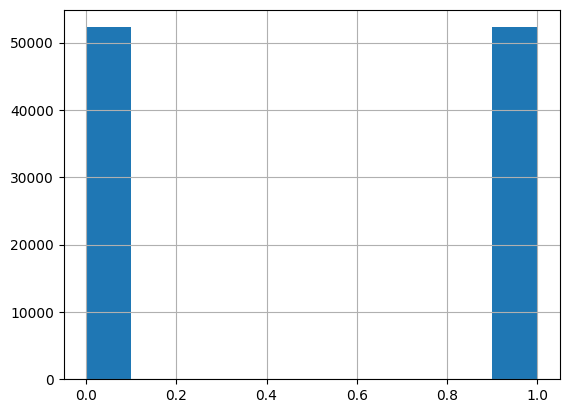

In [ ]:
df_balanced['Vulnerability_status'].hist()

In [ ]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,2114806,NaN,NaN,NaN,"this.mSensorManager.registerListener(this, mSe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"this.mSensorManager.registerListener(this, mSe...",NaN,NaN,NaN
1,1806946,Hidden elements in view can be used to hide da...,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,chatInputDivider.setVisibility(View.GONE);,high,exact,4.3,CWE-919,- Weaknesses in Mobile Applications,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,chatInputDivider.setVisibility(View.GONE);,NaN,NaN,NaN
2,4187517,NaN,NaN,NaN,var4.add(2131230962);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,var4.add(2131230962);,NaN,NaN,NaN
3,1255235,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.v(TAG, ""magnetic sensor accurcay: ""+magAcc...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(TAG, ""user_str""+magAccuracy);",NaN,NaN,NaN
4,1889140,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(DEBUG_TAG, ""Unhandled key event: "" + eve...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(DEBUG_TAG, ""user_str"" + event.toString());",NaN,NaN,NaN


In [ ]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [ ]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,2114806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"this.mSensorManager.registerListener(this, mSe...",NaN,NaN,NaN
1,1806946,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,chatInputDivider.setVisibility(View.GONE);,NaN,NaN,NaN
2,4187517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,var4.add(2131230962);,NaN,NaN,NaN
3,1255235,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(TAG, ""user_str""+magAccuracy);",NaN,NaN,NaN
4,1889140,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(DEBUG_TAG, ""user_str"" + event.toString());",NaN,NaN,NaN
5,2966801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.d((String)""user_str"", (String)(""user_str"" ...",file,WARNING,Logging found
6,1505656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,textView.setText(getString(R.string.dialog_abo...,NaN,NaN,NaN
7,30451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,sql_col_pathnew),NaN,NaN,NaN
8,243111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,game.setCurrentGameTime(current_game_time);,NaN,NaN,NaN
9,3519749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.e(""user_str"", var59.getMessage(), var59);",file,WARNING,Logging found


In [ ]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
104562,3618768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"public static final String NS_XMP_BJ = ""user_s...",file,INFO,Hardcoded HTTP url found
104563,1713931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (oldItem == null) {,NaN,NaN,NaN
104564,235100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mainInputText.addTextChangedListener(new MainI...,NaN,NaN,NaN
104565,4010954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (!this.field_2394) {,NaN,NaN,NaN
104566,643645,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(LoggingUtils.ACCESSIBILITY_TAG, ""user_st...",NaN,NaN,NaN
104567,2564712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,boolean interactsWith(final int n) {,NaN,NaN,NaN
104568,788919,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File outputFile = new File(Environment.getExte...,NaN,NaN,NaN
104569,1814794,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private static final String COURSE_KEY = ""user...",NaN,NaN,NaN
104570,2300222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"for (final int ilbound : new int[]{0, 4}) {",NaN,NaN,NaN
104571,4802388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"su[sizeCommand] = U.sizeCommand(this, ""user_st...",NaN,NaN,NaN


In [ ]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [ ]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [ ]:
df_balanced.head()

,processed_code,Vulnerability_status
0,"this.mSensorManager.registerListener(this, mSe...",0
1,chatInputDivider.setVisibility(View.GONE);,1
2,var4.add(2131230962);,0
3,"Log.v(TAG, ""user_str""+magAccuracy);",1
4,"Log.d(DEBUG_TAG, ""user_str"" + event.toString());",1


In [ ]:
df_balanced.columns = ['text', 'labels']

In [ ]:
df_balanced.head(5)

,text,labels
0,"this.mSensorManager.registerListener(this, mSe...",0
1,chatInputDivider.setVisibility(View.GONE);,1
2,var4.add(2131230962);,0
3,"Log.v(TAG, ""user_str""+magAccuracy);",1
4,"Log.d(DEBUG_TAG, ""user_str"" + event.toString());",1


In [ ]:
df_balanced.head(5)

,text,labels
0,"this.mSensorManager.registerListener(this, mSe...",0
1,chatInputDivider.setVisibility(View.GONE);,1
2,var4.add(2131230962);,0
3,"Log.v(TAG, ""user_str""+magAccuracy);",1
4,"Log.d(DEBUG_TAG, ""user_str"" + event.toString());",1


In [ ]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset, DatasetDict

In [ ]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 104572
    })
})

In [ ]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [ ]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 62743
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 20915
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 20914
    })
})

In [ ]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/graphcodebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [ ]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [ ]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/62743 [00:00<?, ? examples/s]

Map:   0%|          | 0/20915 [00:00<?, ? examples/s]

Map:   0%|          | 0/20914 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [ ]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.8 MB/s eta 0:00:00


In [ ]:
import evaluate

In [ ]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-59-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.140400,0.130208,{'accuracy': 0.9617959261738548},{'recall': 0.9507849369161129},{'precision': 0.9716535433070866},{'f1': 0.9611059728374629}
2,0.104700,0.145319,{'accuracy': 0.9628000382518886},{'recall': 0.9633054030626986},{'precision': 0.9618232522357919},{'f1': 0.9625637570974882}
3,0.072900,0.150338,{'accuracy': 0.965668929903414},{'recall': 0.9643648271212559},{'precision': 0.9664125084451308},{'f1': 0.9653875819514076}
4,0.058600,0.166851,{'accuracy': 0.9660036339294252},{'recall': 0.9667726090725224},{'precision': 0.9648212226066898},{'f1': 0.9657959301486506}


Trainer is attempting to log a value of "{'accuracy': 0.9617959261738548}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9507849369161129}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9716535433070866}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9611059728374629}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9628000382518886}" of type <class 

TrainOutput(global_step=15688, training_loss=0.10142884839255854, metrics={'train_runtime': 5602.101, 'train_samples_per_second': 44.8, 'train_steps_per_second': 2.8, 'total_flos': 6.603350778580992e+16, 'train_loss': 0.10142884839255854, 'epoch': 4.0})

In [ ]:
outcome= trainer.predict(tokenized_datasets['test'])

In [ ]:
print(outcome.metrics)

{'test_loss': 0.17079725861549377, 'test_accuracy': {'accuracy': 0.9661486971073392}, 'test_recall': {'recall': 0.9638360314304648}, 'test_precision': {'precision': 0.9689730655753307}, 'test_f1': {'f1': 0.9663977218794495}, 'test_runtime': 134.5979, 'test_samples_per_second': 155.389, 'test_steps_per_second': 2.429}
